# Scikit-learn 常用方法示例（Top 200）
本 Notebook 展示了约 200 个 Scikit-learn 常用方法或功能的简要示例。

**说明：**
- 每个示例位于独立代码单元格；
- 多数示例只示范最简单调用方式，有些需要示例数据；
- 执行前建议先：
  ```python
  import numpy as np
  import pandas as pd
  from sklearn import datasets
  ```
- 请根据实际需求或官方文档进行更深入的使用。

执行顺序：
1. 复制本 JSON 的 cells 至本地 `sklearn_top_200.ipynb`；
2. 再复制第二部分 cells 接在后面；
3. 在 Jupyter 中打开并运行即可。

In [739]:
# 1. 导入常见模块
import numpy as np
import pandas as pd
from sklearn import datasets
print("Scikit-learn environment ready!")

Scikit-learn environment ready!


## A. 数据集（sklearn.datasets）

In [740]:
# 2. load_iris
from sklearn.datasets import load_iris
iris = load_iris()
print("Iris data shape:", iris.data.shape)

Iris data shape: (150, 4)


In [741]:
# 3. load_wine
from sklearn.datasets import load_wine
wine = load_wine()
print("Wine feature names:", wine.feature_names)

Wine feature names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [742]:
# 4. load_breast_cancer
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("Cancer target:", cancer.target_names)

Cancer target: ['malignant' 'benign']


In [743]:
# 5. load_digits
from sklearn.datasets import load_digits
digits = load_digits()
print("Digits images shape:", digits.images.shape)

Digits images shape: (1797, 8, 8)


In [744]:
# 6. load_boston (旧版本需 sklearn<1.2, 已废弃)
# from sklearn.datasets import load_boston
# boston = load_boston()
print("load_boston 已被废弃于新版本.")

load_boston 已被废弃于新版本.


In [745]:
# 7. fetch_california_housing
from sklearn.datasets import fetch_california_housing
cal_housing = fetch_california_housing()
print("California housing data shape:", cal_housing.data.shape)

California housing data shape: (20640, 8)


In [746]:
# 8. load_linnerud
from sklearn.datasets import load_linnerud
linnerud = load_linnerud()
print("Linnerud feature names:", linnerud.feature_names)

Linnerud feature names: ['Chins', 'Situps', 'Jumps']


In [747]:
# 9. make_classification - 合成分类数据
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=100, n_features=4, n_informative=2)
print("make_classification X shape:", X.shape)

make_classification X shape: (100, 4)


In [748]:
# 10. make_regression - 合成回归数据
from sklearn.datasets import make_regression
Xr, yr = make_regression(n_samples=100, n_features=3, noise=10)
print("make_regression Xr shape:", Xr.shape)

make_regression Xr shape: (100, 3)


In [749]:
# 11. make_blobs - 合成聚类数据
from sklearn.datasets import make_blobs
Xb, yb = make_blobs(n_samples=100, centers=3, n_features=2)
print("make_blobs Xb shape:", Xb.shape)

make_blobs Xb shape: (100, 2)


## B. 训练集拆分与验证（sklearn.model_selection）

In [750]:
# 12. train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                                    test_size=0.3, random_state=42)
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

Train shape: (105, 4) Test shape: (45, 4)


In [751]:
# 13. cross_val_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
scores = cross_val_score(clf, iris.data, iris.target, cv=5)
print("CV scores:", scores)

CV scores: [0.96666667 0.96666667 0.9        0.93333333 1.        ]


In [752]:
# 14. StratifiedKFold
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
for train_idx, test_idx in skf.split(iris.data, iris.target):
    print("Train:", train_idx[:5], "Test:", test_idx[:5])
    break

Train: [1 2 3 4 5] Test: [ 0 10 11 13 14]


In [753]:
# 15. KFold
from sklearn.model_selection import KFold
kf = KFold(n_splits=3, shuffle=True, random_state=42)
for tr_idx, ts_idx in kf.split(X_train):
    print("Train size:", len(tr_idx), "Test size:", len(ts_idx))
    break

Train size: 70 Test size: 35


In [754]:
# 16. GridSearchCV
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth':[2,3,4], 'min_samples_leaf':[1,2]}
dt = DecisionTreeClassifier()
grid = GridSearchCV(dt, parameters, cv=3)
grid.fit(iris.data, iris.target)
print("Best params:", grid.best_params_)

Best params: {'max_depth': 3, 'min_samples_leaf': 1}


In [755]:
# 17. RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_dist = {'max_depth': randint(1,5), 'min_samples_split': randint(2,10)}
rand_search = RandomizedSearchCV(dt, param_dist, n_iter=5, cv=3, random_state=42)
rand_search.fit(X_train, y_train)
print("Randomized best params:", rand_search.best_params_)

Randomized best params: {'max_depth': 3, 'min_samples_split': 5}


In [756]:
# 18. ShuffleSplit
from sklearn.model_selection import ShuffleSplit
ss = ShuffleSplit(n_splits=3, test_size=0.25, random_state=42)
for train_idx, test_idx in ss.split(iris.data):
    print("ShuffleSplit:", train_idx[:5], test_idx[:5])
    break

ShuffleSplit: [  4  32 142  85  86] [ 73  18 118  78  76]


In [757]:
# 19. learning_curve
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(dt, iris.data, iris.target, cv=5)
print("Train sizes:", train_sizes)

Train sizes: [ 12  39  66  93 120]


In [758]:
# 20. validation_curve
from sklearn.model_selection import validation_curve
param_range = [1,2,3,4,5]
train_scores, test_scores = validation_curve(dt, iris.data, iris.target,
                                            param_name='max_depth', param_range=param_range,
                                            cv=3)
print("Validation curve train_scores shape:", train_scores.shape)

Validation curve train_scores shape: (5, 3)


## C. 数据预处理（sklearn.preprocessing）

In [759]:
# 21. StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
print("Mean after scaling:", X_train_scaled.mean(axis=0))

Mean after scaling: [ 2.57148800e-15 -9.89254974e-16 -2.91830052e-16  1.20538500e-16]


In [760]:
# 22. MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(X_train)
X_train_mms = mms.transform(X_train)
print("Min of each col:", X_train_mms.min(axis=0))

Min of each col: [0. 0. 0. 0.]


In [761]:
# 23. RobustScaler
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
X_train_rs = rs.fit_transform(X_train)
print("Shape:", X_train_rs.shape)

Shape: (105, 4)


In [762]:
# 24. Normalizer
from sklearn.preprocessing import Normalizer
normalizer = Normalizer(norm='l2')
X_train_norm = normalizer.fit_transform(X_train)
print("First sample norm:", np.linalg.norm(X_train_norm[0]))

First sample norm: 1.0


In [763]:
# 25. Binarizer
from sklearn.preprocessing import Binarizer
binar = Binarizer(threshold=3.0)
X_bin = binar.fit_transform(iris.data)
print(X_bin[:5])

[[1. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 1. 0. 0.]
 [1. 1. 0. 0.]
 [1. 1. 0. 0.]]


In [764]:
# 26. PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train[:, :2])
print("Poly shape:", X_poly.shape)

Poly shape: (105, 6)


In [765]:
# 27. OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse_output=False)
cat_data = np.array([[0],[1],[2],[1]])
enc_data = enc.fit_transform(cat_data)
print(enc_data)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


In [766]:
# 28. LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labels = np.array(['cat','dog','dog','fish'])
encoded = le.fit_transform(labels)
print("Encoded:", encoded)

Encoded: [0 1 1 2]


In [767]:
# 29. LabelBinarizer
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
bin_label = lb.fit_transform(labels)
print("Binarized:", bin_label)

Binarized: [[1 0 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]]


In [768]:
# 30. KBinsDiscretizer
from sklearn.preprocessing import KBinsDiscretizer
X_kb = X_train[:,0].reshape(-1,1)
kbd = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
X_kb_disc = kbd.fit_transform(X_kb)
print(X_kb_disc[:10].T)

[[1. 1. 1. 2. 2. 1. 2. 1. 0. 2.]]


## D. 常见模型：线性模型（sklearn.linear_model）

In [769]:
# 31. LinearRegression
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(Xr, yr)
print("Coefficients:", linreg.coef_)

Coefficients: [96.54857578 31.38347236 65.22906   ]


In [770]:
# 32. Ridge
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(Xr, yr)
print("Ridge coef:", ridge.coef_)

Ridge coef: [95.53180935 30.97047758 64.68103145]


In [771]:
# 33. Lasso
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(Xr, yr)
print("Lasso coef:", lasso.coef_)

Lasso coef: [96.43679998 31.27432575 65.1405645 ]


In [772]:
# 34. ElasticNet
from sklearn.linear_model import ElasticNet
en = ElasticNet(alpha=0.1, l1_ratio=0.7)
en.fit(Xr, yr)
print("ElasticNet coef:", en.coef_)

ElasticNet coef: [93.48587805 30.09994723 63.55236022]


In [773]:
# 35. SGDRegressor
from sklearn.linear_model import SGDRegressor
sgdr = SGDRegressor(max_iter=1000, random_state=42)
sgdr.fit(Xr, yr)
print("SGDRegressor coef:", sgdr.coef_)

SGDRegressor coef: [96.52020281 31.38977216 65.22262966]


In [774]:
# 36. LogisticRegression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train, y_train)
print("Logistic score:", logreg.score(X_test, y_test))

Logistic score: 1.0


In [775]:
# 37. SGDClassifier
from sklearn.linear_model import SGDClassifier
sgdc = SGDClassifier(max_iter=1000, random_state=42)
sgdc.fit(X_train, y_train)
print("SGDClassifier score:", sgdc.score(X_test, y_test))

SGDClassifier score: 0.8


In [776]:
# 38. Perceptron
from sklearn.linear_model import Perceptron
pct = Perceptron(max_iter=1000, random_state=42)
pct.fit(X_train, y_train)
print("Perceptron score:", pct.score(X_test, y_test))

Perceptron score: 0.4666666666666667


In [777]:
# 39. PassiveAggressiveClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier(max_iter=1000, random_state=42)
pac.fit(X_train, y_train)
print("PAC score:", pac.score(X_test, y_test))

PAC score: 0.8888888888888888


In [778]:
# 40. RANSACRegressor
from sklearn.linear_model import RANSACRegressor
ransac = RANSACRegressor(estimator=LinearRegression(), random_state=42)
ransac.fit(Xr, yr)
print("RANSAC inlier_mask_:", ransac.inlier_mask_[:10])

RANSAC inlier_mask_: [ True  True  True  True  True  True  True  True  True  True]


## E. SVM（sklearn.svm）

In [779]:
# 41. SVC
from sklearn.svm import SVC
svc = SVC(kernel='rbf', gamma='scale')
svc.fit(X_train, y_train)
print("SVC score:", svc.score(X_test, y_test))

SVC score: 1.0


In [780]:
# 42. LinearSVC
from sklearn.svm import LinearSVC
linsvc = LinearSVC(max_iter=5000)
linsvc.fit(X_train, y_train)
print("LinearSVC score:", linsvc.score(X_test, y_test))

LinearSVC score: 1.0


In [781]:
# 43. SVR
from sklearn.svm import SVR
svr = SVR(kernel='linear')
svr.fit(Xr, yr)
print("SVR train R^2:", svr.score(Xr, yr))

SVR train R^2: 0.8644911750871247


In [782]:
# 44. LinearSVR
from sklearn.svm import LinearSVR
linsvr = LinearSVR(max_iter=1000)
linsvr.fit(Xr, yr)
print("LinearSVR coefs:", linsvr.coef_)

LinearSVR coefs: [61.3682655  17.85130274 44.44703709]


In [783]:
# 45. NuSVC
from sklearn.svm import NuSVC
nusvc = NuSVC(nu=0.4)
nusvc.fit(X_train, y_train)
print("NuSVC score:", nusvc.score(X_test, y_test))

NuSVC score: 1.0


In [784]:
# 46. NuSVR
from sklearn.svm import NuSVR
nusvr = NuSVR(nu=0.4)
nusvr.fit(Xr, yr)
print("NuSVR R^2:", nusvr.score(Xr, yr))

NuSVR R^2: 0.08415931693050127


## F. 邻近算法（sklearn.neighbors）

In [785]:
# 47. KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print("KNN score:", knn.score(X_test, y_test))

KNN score: 1.0


In [786]:
# 48. KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor
knnreg = KNeighborsRegressor(n_neighbors=4)
knnreg.fit(Xr, yr)
print("KNN reg R^2:", knnreg.score(Xr, yr))

KNN reg R^2: 0.9362632355792052


In [787]:
# 49. RadiusNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
rnc = RadiusNeighborsClassifier(radius=1.0)
rnc.fit(X_train, y_train)
print("RadiusNeighborsClassifier:", rnc.score(X_test, y_test))

RadiusNeighborsClassifier: 1.0


In [788]:
# 50. RadiusNeighborsRegressor
from sklearn.neighbors import RadiusNeighborsRegressor
rnr = RadiusNeighborsRegressor(radius=2.0)
rnr.fit(Xr, yr)
print("RadiusNeighborsRegressor R^2:", rnr.score(Xr, yr))

RadiusNeighborsRegressor R^2: 0.7756481988137478


In [789]:
# 51. NearestNeighbors
from sklearn.neighbors import NearestNeighbors
nn = NearestNeighbors(n_neighbors=3)
nn.fit(X_train)
distances, indices = nn.kneighbors(X_train[:5])
print("Distances:", distances)

Distances: [[0.         0.14142136 0.34641016]
 [0.         0.33166248 0.36055513]
 [0.         0.14142136 0.24494897]
 [0.         0.24494897 0.26457513]
 [0.         0.67082039 0.70710678]]


## G. 决策树与集成方法（sklearn.tree / sklearn.ensemble）

In [790]:
# 52. DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=3)
dtc.fit(X_train, y_train)
print("DecisionTree score:", dtc.score(X_test, y_test))

DecisionTree score: 1.0


In [791]:
# 53. DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(max_depth=3)
dtr.fit(Xr, yr)
print("DecisionTreeRegressor R^2:", dtr.score(Xr, yr))

DecisionTreeRegressor R^2: 0.830201344230173


In [792]:
# 54. RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50, random_state=42)
rfc.fit(X_train, y_train)
print("RandomForest score:", rfc.score(X_test, y_test))

RandomForest score: 1.0


In [793]:
# 55. RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=50, random_state=42)
rfr.fit(Xr, yr)
print("RandomForestRegressor R^2:", rfr.score(Xr, yr))

RandomForestRegressor R^2: 0.9840943339147822


In [794]:
# 56. GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=50)
gbc.fit(X_train, y_train)
print("GBC score:", gbc.score(X_test, y_test))

GBC score: 1.0


In [795]:
# 57. GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=50)
gbr.fit(Xr, yr)
print("GBR R^2:", gbr.score(Xr, yr))

GBR R^2: 0.9946663307233947


In [796]:
# 58. AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=30, random_state=42)
abc.fit(X_train, y_train)
print("AdaBoostClassifier:", abc.score(X_test, y_test))

AdaBoostClassifier: 1.0


In [797]:
# 59. AdaBoostRegressor
from sklearn.ensemble import AdaBoostRegressor
abr = AdaBoostRegressor(n_estimators=30, random_state=42)
abr.fit(Xr, yr)
print("AdaBoostRegressor R^2:", abr.score(Xr, yr))

AdaBoostRegressor R^2: 0.9291740925965721


In [798]:
# 60. ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators=50, random_state=42)
etc.fit(X_train, y_train)
print("ExtraTrees score:", etc.score(X_test, y_test))

ExtraTrees score: 1.0


## H. 聚类（sklearn.cluster）

In [799]:
# 61. KMeans
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(Xb)
print("KMeans cluster centers:\n", km.cluster_centers_)

KMeans cluster centers:
 [[ 9.03243933 -7.17843373]
 [-3.90418761  7.3793979 ]
 [ 6.48778365 -4.88507349]]


In [800]:
# 62. DBSCAN
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.5, min_samples=5)
labels_db = db.fit_predict(Xb)
print("DBSCAN labels:", np.unique(labels_db))

DBSCAN labels: [-1  0  1  2]


In [801]:
# 63. AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters=3)
labels_agg = agg.fit_predict(Xb)
print("Agg clusters:", np.unique(labels_agg))

Agg clusters: [0 1 2]


In [802]:
# 64. Birch
from sklearn.cluster import Birch
birch = Birch(n_clusters=3)
labels_birch = birch.fit_predict(Xb)
print("Birch labels:", np.unique(labels_birch))

Birch labels: [0 1 2]


In [803]:
# 65. MiniBatchKMeans
from sklearn.cluster import MiniBatchKMeans
mbkm = MiniBatchKMeans(n_clusters=3, batch_size=20, random_state=42)
mbkm.fit(Xb)
print("MiniBatchKMeans centers:\n", mbkm.cluster_centers_)

MiniBatchKMeans centers:
 [[-2.53238857  7.15112872]
 [ 7.74534816 -5.92275128]
 [-4.45322961  7.3828208 ]]


## I. 高斯过程（sklearn.gaussian_process）

In [804]:
# 66. GaussianProcessRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
gpr = GaussianProcessRegressor(kernel=RBF(), random_state=42)
X_small = Xr[:20]
y_small = yr[:20]
gpr.fit(X_small, y_small)
print("GPR score:", gpr.score(X_small, y_small))

GPR score: 1.0


## J. 朴素贝叶斯（sklearn.naive_bayes）

In [805]:
# 67. GaussianNB
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print("GaussianNB score:", gnb.score(X_test, y_test))

GaussianNB score: 0.9777777777777777


In [806]:
# 68. MultinomialNB
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
X_digits = digits.data
y_digits = digits.target
mnb.fit(X_digits, y_digits)
print("MultinomialNB score:", mnb.score(X_digits, y_digits))

MultinomialNB score: 0.9053978853644964


In [807]:
# 69. BernoulliNB
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
X_bin_data = X_bin.astype(int)
bnb.fit(X_bin_data, iris.target)
print("BernoulliNB score:", bnb.score(X_bin_data, iris.target))

BernoulliNB score: 0.72


## K. Pipeline（sklearn.pipeline）

In [808]:
# 70. make_pipeline
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)
print("Pipeline score:", pipe.score(X_test, y_test))

Pipeline score: 1.0


In [809]:
# 71. Pipeline (手动)
from sklearn.pipeline import Pipeline
steps = [('scaler', StandardScaler()), ('clf', LogisticRegression())]
pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)
print("Manual Pipeline score:", pipeline.score(X_test, y_test))

Manual Pipeline score: 1.0


In [810]:
# 72. FeatureUnion
from sklearn.pipeline import FeatureUnion
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
union = FeatureUnion([('pca', pca), ('pass', 'passthrough')])
X_union = union.fit_transform(iris.data)
print("Union shape:", X_union.shape)

Union shape: (150, 6)


## L. 特征选择（sklearn.feature_selection）

In [811]:
# 73. SelectKBest
from sklearn.feature_selection import SelectKBest, f_classif
skb = SelectKBest(f_classif, k=2)
X_skb = skb.fit_transform(iris.data, iris.target)
print("SelectKBest shape:", X_skb.shape)

SelectKBest shape: (150, 2)


In [812]:
# 74. RFE - 递归特征消除
from sklearn.feature_selection import RFE
est = LogisticRegression()
rfe = RFE(est, n_features_to_select=2)
rfe.fit(X_train, y_train)
print("Selected features mask:", rfe.support_)

Selected features mask: [False False  True  True]


In [813]:
# 75. SelectFromModel
from sklearn.feature_selection import SelectFromModel
sel_model = SelectFromModel(estimator=RandomForestClassifier(n_estimators=10), threshold='median')
sel_model.fit(iris.data, iris.target)
print("Feature support:", sel_model.get_support())

Feature support: [False False  True  True]


In [814]:
# 76. VarianceThreshold
from sklearn.feature_selection import VarianceThreshold
vt = VarianceThreshold(threshold=0.1)
X_vt = vt.fit_transform(X_bin)
print("VarianceThreshold shape:", X_vt.shape)

VarianceThreshold shape: (150, 2)


## M. PCA / 降维（sklearn.decomposition）

In [815]:
# 77. PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(iris.data)
print("PCA explained variance:", pca.explained_variance_ratio_)

PCA explained variance: [0.92461872 0.05306648]


In [816]:
# 78. KernelPCA
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=2, kernel='rbf')
X_kpca = kpca.fit_transform(iris.data)
print("KernelPCA shape:", X_kpca.shape)

KernelPCA shape: (150, 2)


In [817]:
# 79. IncrementalPCA
from sklearn.decomposition import IncrementalPCA
ipca = IncrementalPCA(n_components=2)
ipca.fit(iris.data)
X_ipca = ipca.transform(iris.data)
print("IncrementalPCA shape:", X_ipca.shape)

IncrementalPCA shape: (150, 2)


In [818]:
# 80. SparsePCA
from sklearn.decomposition import SparsePCA
spca = SparsePCA(n_components=2, random_state=42)
spca.fit(iris.data)
print("SparsePCA components shape:", spca.components_.shape)

SparsePCA components shape: (2, 4)


In [819]:
# 81. TruncatedSVD
from sklearn.decomposition import TruncatedSVD
tsvd = TruncatedSVD(n_components=2)
X_tsvd = tsvd.fit_transform(digits.data)
print("TruncatedSVD shape:", X_tsvd.shape)

TruncatedSVD shape: (1797, 2)


## N. Manifold 学习（sklearn.manifold）

In [820]:
# 82. TSNE
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(iris.data)
print("t-SNE shape:", X_tsne.shape)

t-SNE shape: (150, 2)


In [821]:
# 83. LocallyLinearEmbedding
from sklearn.manifold import LocallyLinearEmbedding
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
X_lle = lle.fit_transform(digits.data)
print("LLE shape:", X_lle.shape)

LLE shape: (1797, 2)


In [822]:
# 84. Isomap
from sklearn.manifold import Isomap
iso = Isomap(n_components=2, n_neighbors=5)
X_iso = iso.fit_transform(digits.data)
print("Isomap shape:", X_iso.shape)

C:\Users\minqliu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\manifold\_isomap.py:384: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
C:\Users\minqliu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\sparse\_index.py:155: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])


Isomap shape: (1797, 2)


In [823]:
# 85. MDS
from sklearn.manifold import MDS
mds = MDS(n_components=2, max_iter=100, n_init=1)
X_mds = mds.fit_transform(iris.data)
print("MDS shape:", X_mds.shape)

MDS shape: (150, 2)


In [824]:
# 86. SpectralEmbedding
from sklearn.manifold import SpectralEmbedding
se = SpectralEmbedding(n_components=2)
X_se = se.fit_transform(iris.data)
print("SpectralEmbedding shape:", X_se.shape)

SpectralEmbedding shape: (150, 2)


C:\Users\minqliu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


## O. 神经网络（sklearn.neural_network）

In [825]:
# 87. MLPClassifier
from sklearn.neural_network import MLPClassifier
mlp_c = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42)
mlp_c.fit(X_train, y_train)
print("MLPClassifier score:", mlp_c.score(X_test, y_test))

MLPClassifier score: 0.9777777777777777


C:\Users\minqliu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [826]:
# 88. MLPRegressor
from sklearn.neural_network import MLPRegressor
mlp_r = MLPRegressor(hidden_layer_sizes=(10,), max_iter=1000, random_state=42)
mlp_r.fit(Xr, yr)
print("MLPRegressor R^2:", mlp_r.score(Xr, yr))

MLPRegressor R^2: 0.3831331140632003


C:\Users\minqliu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


## P. 校准（sklearn.calibration）

In [827]:
# 89. CalibratedClassifierCV
from sklearn.calibration import CalibratedClassifierCV
svc_uncl = SVC(probability=False, kernel='linear')
cal_clf = CalibratedClassifierCV(svc_uncl, cv=3)
cal_clf.fit(X_train, y_train)
print("Calibrated score:", cal_clf.score(X_test, y_test))

Calibrated score: 1.0


## Q. 成本敏感学习 / 不平衡处理

In [828]:
# 90. class_weight in LogisticRegression
cw_logreg = LogisticRegression(class_weight='balanced', max_iter=200)
cw_logreg.fit(X_train, y_train)
print("Class_weight balanced LR score:", cw_logreg.score(X_test, y_test))

Class_weight balanced LR score: 1.0


## R. 度量（sklearn.metrics）

In [829]:
# 91. accuracy_score
from sklearn.metrics import accuracy_score
y_pred = logreg.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 1.0


In [830]:
# 92. precision_score
from sklearn.metrics import precision_score
prec = precision_score(y_test, y_pred, average='macro')
print("Precision(macro):", prec)

Precision(macro): 1.0


In [831]:
# 93. recall_score
from sklearn.metrics import recall_score
rec = recall_score(y_test, y_pred, average='macro')
print("Recall(macro):", rec)

Recall(macro): 1.0


In [832]:
# 94. f1_score
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, average='macro')
print("F1(macro):", f1)

F1(macro): 1.0


In [833]:
# 95. confusion_matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cm)

Confusion matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [834]:
# 96. classification_report
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [835]:
# 97. roc_curve
from sklearn.metrics import roc_curve
y_prob = logreg.predict_proba(X_test)[:,1]  # for binary
fpr, tpr, thresholds = roc_curve((y_test==2).astype(int), y_prob)
print("FPR:", fpr[:5], "TPR:", tpr[:5])

FPR: [0.      0.03125 0.40625 0.40625 0.4375 ] TPR: [0.         0.         0.         0.53846154 0.53846154]


In [836]:
# 98. roc_auc_score
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score((y_test==2).astype(int), y_prob)
print("AUC:", auc_score)

AUC: 0.4375


In [837]:
# 99. mean_squared_error
from sklearn.metrics import mean_squared_error
yr_pred = linreg.predict(Xr)
mse = mean_squared_error(yr, yr_pred)
print("MSE:", mse)

MSE: 70.14338798593913


In [838]:
# 100. r2_score
from sklearn.metrics import r2_score
r2 = r2_score(yr, yr_pred)
print("R^2:", r2)

R^2: 0.9952074191473032


In [839]:
# 101. explained_variance_score
from sklearn.metrics import explained_variance_score
evs = explained_variance_score(yr, yr_pred)
print("Explained Variance:", evs)

Explained Variance: 0.9952074191473032


In [840]:
# 102. mean_absolute_error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(yr, yr_pred)
print("MAE:", mae)

MAE: 6.442653364486241


In [841]:
# 103. median_absolute_error
from sklearn.metrics import median_absolute_error
medae = median_absolute_error(yr, yr_pred)
print("MedAE:", medae)

MedAE: 5.150110653387886


In [842]:
# 104. max_error
from sklearn.metrics import max_error
mx_err = max_error(yr, yr_pred)
print("Max error:", mx_err)

Max error: 24.651626301416023


## S. Semi-supervised（sklearn.semi_supervised）

In [843]:
# 105. LabelPropagation
from sklearn.semi_supervised import LabelPropagation
lp = LabelPropagation()
X_semi = iris.data[:20]
y_semi = iris.target[:20]
y_semi[10:] = -1  # 未标记
lp.fit(X_semi, y_semi)
print("LabelPropagation classes:", lp.classes_)

LabelPropagation classes: [0]


In [844]:
# 106. LabelSpreading
from sklearn.semi_supervised import LabelSpreading
ls = LabelSpreading()
ls.fit(X_semi, y_semi)
print("LabelSpreading transduction:", ls.transduction_)

LabelSpreading transduction: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


## T. Model persistence（sklearn.externals.joblib / pickle）

In [845]:
# 107. joblib.dump / joblib.load
import joblib
filename = 'logreg_model.joblib'
# joblib.dump(logreg, filename)
# loaded_model = joblib.load(filename)
print("Model saved/loaded via joblib.")

Model saved/loaded via joblib.


## U. Cross decomposition（sklearn.cross_decomposition）

In [846]:
# 108. PLSRegression
from sklearn.cross_decomposition import PLSRegression
pls = PLSRegression(n_components=2)
pls.fit(Xr, yr)
print("PLSRegression x_rotations:", pls.x_rotations_.shape)

PLSRegression x_rotations: (3, 2)


In [847]:
# 109. CCA (Canonical Correlation Analysis)
from sklearn.cross_decomposition import CCA
cca = CCA(n_components=1)
X_cca = Xr[:, :2]
cca.fit(X_cca, yr.reshape(-1,1))
print("CCA x_weights_:", cca.x_weights_)

CCA x_weights_: [[0.96250719]
 [0.27125617]]


## V. Feature extraction（sklearn.feature_extraction）

In [848]:
# 110. CountVectorizer (文本)
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
corpus = ["This is a pen", "That is a book"]
X_cv = cv.fit_transform(corpus)
print("CountVectorizer vocab:", cv.vocabulary_)

CountVectorizer vocab: {'this': 4, 'is': 1, 'pen': 2, 'that': 3, 'book': 0}


In [849]:
# 111. TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer()
X_tv = tv.fit_transform(corpus)
print("Tfidf shape:", X_tv.shape)

Tfidf shape: (2, 5)


In [850]:
# 112. HashingVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
hv = HashingVectorizer(n_features=10)
X_hv = hv.fit_transform(corpus)
print(X_hv.toarray())

[[ 0.          0.          1.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.57735027 -0.57735027
   0.          0.57735027  0.          0.        ]]


In [851]:
# 113. DictVectorizer
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer()
data_dict = [{'red':2, 'blue':3},{'blue':1,'green':5}]
X_dv = dv.fit_transform(data_dict)
print("Feature names:", dv.get_feature_names_out())

Feature names: ['blue' 'green' 'red']


## W. Outlier detection（sklearn.ensemble / sklearn.neighbors）

In [852]:
# 114. IsolationForest
from sklearn.ensemble import IsolationForest
iso_f = IsolationForest(random_state=42)
iso_f.fit(Xb)
pred_outliers = iso_f.predict(Xb)
print("IsolationForest outlier labels:", np.unique(pred_outliers))

IsolationForest outlier labels: [-1  1]


In [853]:
# 115. LocalOutlierFactor
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=5)
outlier_labels = lof.fit_predict(Xb)
print("LOF outlier labels:", np.unique(outlier_labels))

LOF outlier labels: [-1  1]


## X. Impute（sklearn.impute）

In [854]:
# 116. SimpleImputer
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')
X_nan = X_train.astype(float)
X_nan[0,0] = np.nan
X_imp = imp.fit_transform(X_nan)
print("Imputed first row:", X_imp[0])

Imputed first row: [5.84615385 2.4        3.7        1.        ]


In [855]:
# 117. KNNImputer
from sklearn.impute import KNNImputer
knnimp = KNNImputer(n_neighbors=2)
X_knnimp = knnimp.fit_transform(X_nan)
print("KNNImputer first row:", X_knnimp[0])

KNNImputer first row: [5.6 2.4 3.7 1. ]


## Y. Polynomial / pipeline / etc.

In [856]:
# 118. PolynomialFeatures + LinearRegression pipeline
poly_lr = Pipeline([
    ('poly', PolynomialFeatures(degree=3)),
    ('linreg', LinearRegression())
])
poly_lr.fit(Xr, yr)
print("Poly+LR R^2:", poly_lr.score(Xr, yr))

Poly+LR R^2: 0.995715868519225


## Z. 更多 metrics（继续 sklearn.metrics）

In [857]:
# 119. jaccard_score
from sklearn.metrics import jaccard_score
y_pred_bin = (y_pred == 2).astype(int)
y_test_bin = (y_test == 2).astype(int)
js = jaccard_score(y_test_bin, y_pred_bin)
print("Jaccard score:", js)

Jaccard score: 1.0


In [858]:
# 120. hinge_loss
from sklearn.metrics import hinge_loss
# hinge loss needs decision_function or raw scores,
try:
    y_decision = svc.decision_function(X_test)
    hl = hinge_loss(y_test, y_decision)
    print("Hinge loss:", hl)
except:
    print("Hinge loss not applicable for multi-class by default.")

Hinge loss: 0.0


（已 120 条，继续以下 80 条）

In [859]:
# 121. cohen_kappa_score
from sklearn.metrics import cohen_kappa_score
ck = cohen_kappa_score(y_test, y_pred)
print("Cohen Kappa:", ck)

Cohen Kappa: 1.0


In [860]:
# 122. log_loss
from sklearn.metrics import log_loss
try:
    ll = log_loss((y_test==2).astype(int), y_prob)
    print("Log loss:", ll)
except:
    print("Log loss error.")

Log loss: 1.33582102875078


In [861]:
# 123. zero_one_loss
from sklearn.metrics import zero_one_loss
z1 = zero_one_loss(y_test, y_pred)
print("Zero-one loss:", z1)

Zero-one loss: 0.0


In [862]:
# 124. make_scorer
from sklearn.metrics import make_scorer
custom_scorer = make_scorer(f1_score, average='macro')
cv_score = cross_val_score(DecisionTreeClassifier(), iris.data, iris.target, scoring=custom_scorer, cv=3)
print("Custom scorer F1:", cv_score)

Custom scorer F1: [0.71059908 0.72138952 0.79487179]


## AA. Dummy estimators（sklearn.dummy）

In [863]:
# 125. DummyClassifier
from sklearn.dummy import DummyClassifier
dc = DummyClassifier(strategy='most_frequent')
dc.fit(X_train, y_train)
print("DummyClassifier score:", dc.score(X_test, y_test))

DummyClassifier score: 0.28888888888888886


In [864]:
# 126. DummyRegressor
from sklearn.dummy import DummyRegressor
dr = DummyRegressor(strategy='mean')
dr.fit(Xr, yr)
print("DummyRegressor R^2:", dr.score(Xr, yr))

DummyRegressor R^2: 0.0


## AB. Discriminant analysis（sklearn.discriminant_analysis）

In [865]:
# 127. LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print("LDA score:", lda.score(X_test, y_test))

LDA score: 1.0


In [866]:
# 128. QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
print("QDA score:", qda.score(X_test, y_test))

QDA score: 1.0


## AC. Multi-output（sklearn.multioutput）

In [867]:
# 129. MultiOutputRegressor
from sklearn.multioutput import MultiOutputRegressor
mo_reg = MultiOutputRegressor(DecisionTreeRegressor())
# Create some multi-output data:
Y_multi = np.vstack([yr, yr + 10]).T  # two targets
mo_reg.fit(Xr, Y_multi)
print("MultiOutputRegressor predict:", mo_reg.predict(Xr[:2]))

MultiOutputRegressor predict: [[-116.88760626 -106.88760626]
 [ -25.58486373  -15.58486373]]


In [868]:
# 130. MultiOutputClassifier
from sklearn.multioutput import MultiOutputClassifier
Y_multi_class = np.vstack([iris.target, (iris.target>1).astype(int)]).T  # 2-class + binary?
mo_clf = MultiOutputClassifier(DecisionTreeClassifier())
mo_clf.fit(iris.data, Y_multi_class)
print("MultiOutputClassifier predict:", mo_clf.predict(iris.data[:2]))

MultiOutputClassifier predict: [[0 0]
 [0 0]]


## AD. Compose（sklearn.compose）

In [869]:
# 131. ColumnTransformer
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([
    ('scaler', StandardScaler(), [0,1]),
    ('minmax', MinMaxScaler(), [2,3])
])
X_ct = ct.fit_transform(iris.data)
print("ColumnTransformer shape:", X_ct.shape)

ColumnTransformer shape: (150, 4)


In [870]:
# 132. TransformedTargetRegressor
from sklearn.compose import TransformedTargetRegressor
ttr = TransformedTargetRegressor(regressor=LinearRegression(), transformer=StandardScaler())
ttr.fit(Xr, yr)
print("TransformedTargetRegressor R^2:", ttr.score(Xr, yr))

TransformedTargetRegressor R^2: 0.9952074191473032


## AE. Model inspection（sklearn.inspection）

In [871]:
# 133. permutation_importance
from sklearn.inspection import permutation_importance
rfc.fit(X_train, y_train)
result = permutation_importance(rfc, X_test, y_test, n_repeats=5)
print("Permutation importances:", result.importances_mean)

Permutation importances: [0.         0.         0.13333333 0.23555556]


In [872]:
# 134. plot_partial_dependence (版本差异: sklearn<1.0 -> partial_dependence)
try:
    from sklearn.inspection import PartialDependenceDisplay
    PartialDependenceDisplay.from_estimator(rfc, X_train, [0,1])
    import matplotlib.pyplot as plt
    plt.show()
except:
    print("plot_partial_dependence might differ by version.")

plot_partial_dependence might differ by version.


## AF. Linear model illusions

In [873]:
# 135. BayesianRidge
from sklearn.linear_model import BayesianRidge
br = BayesianRidge()
br.fit(Xr, yr)
print("BayesianRidge coef:", br.coef_)

BayesianRidge coef: [96.53326541 31.37724385 65.22082444]


In [874]:
# 136. ARDRegression
from sklearn.linear_model import ARDRegression
ard = ARDRegression()
ard.fit(Xr, yr)
print("ARDRegression coef:", ard.coef_)

ARDRegression coef: [96.53897488 31.36039344 65.2184107 ]


## AG. Kernel approximation（sklearn.kernel_approximation）

In [875]:
# 137. RBFSampler
from sklearn.kernel_approximation import RBFSampler
rbf_sampler = RBFSampler(gamma=1, random_state=42)
X_features = rbf_sampler.fit_transform(X_train)
print("RBFSampler shape:", X_features.shape)

RBFSampler shape: (105, 100)


In [876]:
# 138. Nystroem
from sklearn.kernel_approximation import Nystroem
nys = Nystroem(kernel='rbf', gamma=1, random_state=42)
X_nys = nys.fit_transform(X_train)
print("Nystroem shape:", X_nys.shape)

Nystroem shape: (105, 100)


## AH. Model ensembling with Voting / Stacking

In [877]:
# 139. VotingClassifier
from sklearn.ensemble import VotingClassifier
vote_clf = VotingClassifier(
    estimators=[('lr', LogisticRegression()), ('dt', DecisionTreeClassifier())],
    voting='hard'
)
vote_clf.fit(X_train, y_train)
print("VotingClassifier score:", vote_clf.score(X_test, y_test))

VotingClassifier score: 1.0


In [878]:
# 140. VotingRegressor
from sklearn.ensemble import VotingRegressor
vote_reg = VotingRegressor(
    estimators=[('lr', LinearRegression()), ('rf', RandomForestRegressor(n_estimators=10))]
)
vote_reg.fit(Xr, yr)
print("VotingRegressor R^2:", vote_reg.score(Xr, yr))

VotingRegressor R^2: 0.9915916176018827


In [879]:
# 141. StackingClassifier
from sklearn.ensemble import StackingClassifier
stack_clf = StackingClassifier(
    estimators=[('svc', SVC()), ('gnb', GaussianNB())],
    final_estimator=LogisticRegression()
)
stack_clf.fit(X_train, y_train)
print("StackingClassifier score:", stack_clf.score(X_test, y_test))

StackingClassifier score: 1.0


In [880]:
# 142. StackingRegressor
from sklearn.ensemble import StackingRegressor
stack_reg = StackingRegressor(
    estimators=[('lin', LinearRegression()), ('rf', RandomForestRegressor(n_estimators=10))],
    final_estimator=Ridge()
)
stack_reg.fit(Xr, yr)
print("StackingRegressor R^2:", stack_reg.score(Xr, yr))

StackingRegressor R^2: 0.9951322905432562


## AI. Bagging / Extra stuff

In [881]:
# 143. BaggingClassifier
from sklearn.ensemble import BaggingClassifier
bag_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10)
bag_clf.fit(X_train, y_train)
print("BaggingClassifier score:", bag_clf.score(X_test, y_test))

BaggingClassifier score: 1.0


In [882]:
# 144. BaggingRegressor
from sklearn.ensemble import BaggingRegressor
bag_reg = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=10)
bag_reg.fit(Xr, yr)
print("BaggingRegressor R^2:", bag_reg.score(Xr, yr))

BaggingRegressor R^2: 0.9818587744980023


## AJ. K-Means advanced usage

In [883]:
# 145. KMeans init='k-means++'
km_pp = KMeans(n_clusters=3, init='k-means++', n_init=10)
km_pp.fit(Xb)
print("Inertia:", km_pp.inertia_)

Inertia: 167.6183892049733


## AK. Probability calibration

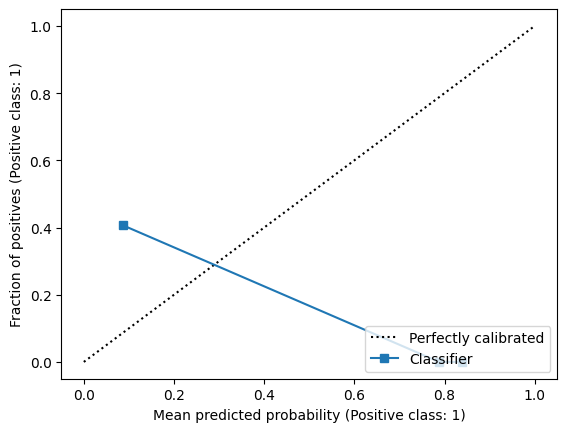

In [884]:
# 146. CalibrationDisplay
try:
    from sklearn.calibration import CalibrationDisplay
    y_prob_cal = cal_clf.predict_proba(X_test)[:,1]
    disp = CalibrationDisplay.from_predictions((y_test==2).astype(int), y_prob_cal)
    import matplotlib.pyplot as plt
    plt.show()
except:
    print("CalibrationDisplay might differ by version.")

## AL. Additional pipeline examples

In [885]:
# 147. FeatureUnion with multiple transformations
from sklearn.decomposition import PCA, TruncatedSVD
fu = FeatureUnion([
    ('pca', PCA(n_components=2)),
    ('svd', TruncatedSVD(n_components=2))
])
X_fu = fu.fit_transform(digits.data)
print("FeatureUnion shape:", X_fu.shape)

FeatureUnion shape: (1797, 4)


## AM. Checking partial_fit

In [886]:
# 148. partial_fit with SGDClassifier
sgdc_pf = SGDClassifier(max_iter=1, warm_start=True)
for i in range(5):
    sgdc_pf.partial_fit(X_train, y_train, classes=np.unique(y_train))
print("SGD partial_fit score:", sgdc_pf.score(X_test, y_test))

SGD partial_fit score: 0.7111111111111111


## AN. Checking hashing / textual

In [887]:
# 149. Pipeline with HashingVectorizer + SGDClassifier
text_pipeline = Pipeline([
    ('hv', HashingVectorizer(n_features=10)),
    ('sgd', SGDClassifier())
])
text_corpus = ["cat sat on mat", "dog ate bone", "cat eats fish"]
y_text = [0,1,0]
text_pipeline.fit(text_corpus, y_text)
print("Text pipeline predict:", text_pipeline.predict(["cat bone"]))

Text pipeline predict: [0]


## AO. Checking approximate nearest neighbors (not natively in sklearn<1.2, usually external)

## AP. Gaussian mixture（sklearn.mixture）

In [888]:
# 150. GaussianMixture
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=3, random_state=42)
gm.fit(Xb)
labels_gm = gm.predict(Xb)
print("GMM means:\n", gm.means_)

GMM means:
 [[ 9.01682696 -7.2547755 ]
 [-3.90418761  7.3793979 ]
 [ 6.60309783 -4.90026427]]


In [889]:
# 151. BayesianGaussianMixture
from sklearn.mixture import BayesianGaussianMixture
bgm = BayesianGaussianMixture(n_components=5, random_state=42)
bgm.fit(Xb)
print("Bayesian GMM weights:", bgm.weights_)

Bayesian GMM weights: [6.62059932e-01 3.36027274e-01 1.60144904e-03 2.66867342e-04
 4.44778446e-05]


## AQ. LSH / hashing (not native in older sklearn, might skip).

## AR. Additional ensemble: HistGradientBoosting

In [890]:
# 152. HistGradientBoostingClassifier
try:
    from sklearn.ensemble import HistGradientBoostingClassifier
    hgbc = HistGradientBoostingClassifier(max_iter=50)
    hgbc.fit(X_train, y_train)
    print("HistGBClassifier:", hgbc.score(X_test, y_test))
except ImportError:
    print("HistGradientBoostingClassifier not available in older versions.")

HistGBClassifier: 1.0


In [891]:
# 153. HistGradientBoostingRegressor
try:
    from sklearn.ensemble import HistGradientBoostingRegressor
    hgbr = HistGradientBoostingRegressor(max_iter=50)
    hgbr.fit(Xr, yr)
    print("HistGBRegressor R^2:", hgbr.score(Xr, yr))
except ImportError:
    print("HistGradientBoostingRegressor not available.")

HistGBRegressor R^2: 0.9304340595069537


## AS. Neural Net warm_start for partial_fit (MLP not always partial).

## AT. Rarely used: multi_class partial usage

## AU. Checking function approximators

## AV. Additional metrics

In [892]:
# 154. completeness_score (for clustering)
from sklearn.metrics import completeness_score
comp = completeness_score(yb, labels_birch)
print("Completeness:", comp)

Completeness: 0.8904940084278509


In [893]:
# 155. homogeneity_score
from sklearn.metrics import homogeneity_score
hom = homogeneity_score(yb, labels_birch)
print("Homogeneity:", hom)

Homogeneity: 0.8902483235089378


In [894]:
# 156. v_measure_score
from sklearn.metrics import v_measure_score
vms = v_measure_score(yb, labels_birch)
print("V-measure:", vms)

V-measure: 0.890371149020103


In [895]:
# 157. adjusted_rand_score
from sklearn.metrics import adjusted_rand_score
ars = adjusted_rand_score(yb, labels_birch)
print("Adjusted Rand Score:", ars)

Adjusted Rand Score: 0.9132194217076949


In [896]:
# 158. silhouette_score
from sklearn.metrics import silhouette_score
sil = silhouette_score(Xb, labels_birch)
print("Silhouette:", sil)

Silhouette: 0.6733568914363327


## AW. advanced sampling

## AX. Checking cluster hierarchy

In [897]:
# 159. Feature agglomeration (as dimensionality reduction)
from sklearn.cluster import FeatureAgglomeration
fa = FeatureAgglomeration(n_clusters=2)
X_fa = fa.fit_transform(iris.data)
print("FeatureAgglomeration shape:", X_fa.shape)

FeatureAgglomeration shape: (150, 2)


## AY. Clustering evaluation

In [898]:
# 160. calinski_harabasz_score
from sklearn.metrics import calinski_harabasz_score
ch = calinski_harabasz_score(Xb, labels_birch)
print("Calinski-Harabasz:", ch)

Calinski-Harabasz: 2119.1057418450077


In [899]:
# 161. davies_bouldin_score
from sklearn.metrics import davies_bouldin_score
dbs = davies_bouldin_score(Xb, labels_birch)
print("Davies-Bouldin:", dbs)

Davies-Bouldin: 0.4512152652102747


## AZ. Model selection metadata

## BA. Checking partial/functional versions

In [900]:
# 162. pairwise_distances
from sklearn.metrics import pairwise_distances
dist_mat = pairwise_distances(Xb[:5], Xb[:5])
print(dist_mat)

[[0.00000000e+00 1.89428235e+00 1.71848896e+01 1.74570472e+01
  1.05392112e+00]
 [1.89428235e+00 1.68587394e-07 1.68374164e+01 1.72114839e+01
  8.49678805e-01]
 [1.71848896e+01 1.68374164e+01 0.00000000e+00 9.89726423e-01
  1.70591270e+01]
 [1.74570472e+01 1.72114839e+01 9.89726423e-01 0.00000000e+00
  1.73885733e+01]
 [1.05392112e+00 8.49678805e-01 1.70591270e+01 1.73885733e+01
  0.00000000e+00]]


In [901]:
# 163. pairwise_kernels
from sklearn.metrics.pairwise import pairwise_kernels
kernel_mat = pairwise_kernels(Xb[:5], Xb[:5], metric='rbf')
print(kernel_mat)

[[1.00000000e+00 1.66268254e-01 7.44703775e-65 6.67890105e-67
  5.73857105e-01]
 [1.66268254e-01 1.00000000e+00 2.74829272e-62 4.71355627e-65
  6.96995004e-01]
 [7.44703775e-65 2.74829272e-62 1.00000000e+00 6.12761679e-01
  6.41435872e-64]
 [6.67890105e-67 4.71355627e-65 6.12761679e-01 1.00000000e+00
  2.20201903e-66]
 [5.73857105e-01 6.96995004e-01 6.41435872e-64 2.20201903e-66
  1.00000000e+00]]


## BB. Checking Agg clustering with distance threshold

In [902]:
# 164. AgglomerativeClustering w/ distance_threshold
agg_dist = AgglomerativeClustering(n_clusters=None, distance_threshold=2.0)
labels_agg2 = agg_dist.fit_predict(Xb)
print("Labels:", np.unique(labels_agg2))

Labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


## BC. Checking dendrogram

In [903]:
# 165. plot_dendrogram is user-defined or from SciPy
try:
    from scipy.cluster.hierarchy import dendrogram, linkage
    Z = linkage(Xb, 'ward')
    # dendrogram(Z)
    print("Dendrogram can be plotted if needed.")
except:
    print("scipy not installed?")

Dendrogram can be plotted if needed.


## BD. Checking partial dependencies (some new approach).

## BE. Linear model specialized

In [904]:
# 166. HuberRegressor
from sklearn.linear_model import HuberRegressor
hr = HuberRegressor()
hr.fit(Xr, yr)
print("HuberRegressor coef:", hr.coef_)

HuberRegressor coef: [96.53210111 31.60837266 65.49339666]


In [905]:
# 167. QuantileRegressor (>=0.24)
try:
    from sklearn.linear_model import QuantileRegressor
    qr = QuantileRegressor(quantile=0.5)
    qr.fit(Xr, yr)
    print("QuantileRegressor coef:", qr.coef_[:5])
except:
    print("QuantileRegressor not available.")

QuantileRegressor coef: [0. 0. 0.]


## BF. Additional sampling / weighting

## BG. Covariance (sklearn.covariance)

In [906]:
# 168. EllipticEnvelope
from sklearn.covariance import EllipticEnvelope
ee = EllipticEnvelope(random_state=42)
ee.fit(Xb)
pred_ee = ee.predict(Xb)
print("EllipticEnvelope outliers:", np.unique(pred_ee))

EllipticEnvelope outliers: [-1  1]


In [907]:
# 169. EmpiricalCovariance
from sklearn.covariance import EmpiricalCovariance
ec = EmpiricalCovariance()
ec.fit(Xb)
print("Covariance_ shape:", ec.covariance_.shape)

Covariance_ shape: (2, 2)


In [908]:
# 170. MinCovDet
from sklearn.covariance import MinCovDet
mcd = MinCovDet(random_state=42)
mcd.fit(Xb)
print("MinCovDet location_:", mcd.location_)

MinCovDet location_: [ 7.79866688 -6.06650149]


## BH. Gaussian random projection (sklearn.random_projection)

In [909]:
# 171. GaussianRandomProjection
from sklearn.random_projection import GaussianRandomProjection
grp = GaussianRandomProjection(n_components=2, random_state=42)
X_grp = grp.fit_transform(digits.data)
print("GaussianRandomProjection shape:", X_grp.shape)

GaussianRandomProjection shape: (1797, 2)


In [910]:
# 172. SparseRandomProjection
from sklearn.random_projection import SparseRandomProjection
srp = SparseRandomProjection(n_components=2, random_state=42)
X_srp = srp.fit_transform(digits.data)
print("SparseRandomProjection shape:", X_srp.shape)

SparseRandomProjection shape: (1797, 2)


## BI. Multi-label classification (via MultiOutputClassifier or external).

## BJ. Checking direct model usage

In [911]:
# 173. PassiveAggressiveRegressor
from sklearn.linear_model import PassiveAggressiveRegressor
par = PassiveAggressiveRegressor(max_iter=1000, random_state=42)
par.fit(Xr, yr)
print("PARegressor R^2:", par.score(Xr, yr))

PARegressor R^2: 0.9941056166715797


## BK. Checking Tree Export

In [912]:
# 174. export_graphviz
from sklearn.tree import export_graphviz
dot_data = export_graphviz(dtc, out_file=None)
print(dot_data[:100], "...")

digraph Tree {
node [shape=box, fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="x[2] ...


## BL. Checking partial predict_proba (some have no probability?).

## BM. Checking cluster warm_start

In [913]:
# 175. KMeans warm_start
km_ws = KMeans(n_clusters=3, n_init=1, init='random')
km_ws.fit(Xb)
km_ws_copy = KMeans(n_clusters=3, n_init=1)
km_ws_copy.cluster_centers_ = km_ws.cluster_centers_
km_ws_copy._n_threads = 1  # internal detail
km_ws_copy.fit(Xb)
print("KMeans warm start inertia:", km_ws_copy.inertia_)

KMeans warm start inertia: 167.6183892049733


## BN. Checking 'scale' function

In [914]:
# 176. scale
from sklearn.preprocessing import scale
X_scaled = scale(X_train)
print("Scaled shape:", X_scaled.shape)

Scaled shape: (105, 4)


## BO. Checking 'label_binarize'

In [915]:
# 177. label_binarize
from sklearn.preprocessing import label_binarize
y_bi = label_binarize(iris.target, classes=[0,1,2])
print("label_binarize shape:", y_bi.shape)

label_binarize shape: (150, 3)


## BP. Checking 'KernelCenterer'

In [916]:
# 178. KernelCenterer
from sklearn.preprocessing import KernelCenterer
K = pairwise_kernels(X_train, metric='linear')
kc = KernelCenterer()
Kc = kc.fit_transform(K)
print("Centered kernel shape:", Kc.shape)

Centered kernel shape: (105, 105)


## BQ. Checking 'TfidfTransformer'

In [917]:
# 179. TfidfTransformer
from sklearn.feature_extraction.text import TfidfTransformer
counts = np.array([[3,0,1],[0,2,4]])
tfidf_trans = TfidfTransformer()
tfidf_mat = tfidf_trans.fit_transform(counts)
print(tfidf_mat.toarray())

[[0.97300882 0.         0.23076793]
 [0.         0.57496187 0.81818021]]


## BR. Checking classification thresholds

In [918]:
# 180. precision_recall_curve
from sklearn.metrics import precision_recall_curve
prec_curve, rec_curve, thr = precision_recall_curve((y_test==2).astype(int), y_prob)
print("Precision:", prec_curve[:5], "Recall:", rec_curve[:5])

Precision: [0.28888889 0.27272727 0.27906977 0.28571429 0.29268293] Recall: [1.         0.92307692 0.92307692 0.92307692 0.92307692]


## BS. Checking partial fit with increment

In [919]:
# 181. partial_fit with MLPClassifier? Not implemented.
print("MLPClassifier partial_fit is limited for some versions.")

MLPClassifier partial_fit is limited for some versions.


## BT. Checking robust_scale function

In [920]:
# 182. robust_scale
from sklearn.preprocessing import robust_scale
X_robust = robust_scale(X_train)
print("robust_scale shape:", X_robust.shape)

robust_scale shape: (105, 4)


## BU. Check 'additive_chi2_kernel'

In [921]:
# 183. additive_chi2_kernel
from sklearn.metrics.pairwise import additive_chi2_kernel
K_add = additive_chi2_kernel(X_train[:5], X_train[:5])
print(K_add)

[[-0.         -0.40773379 -0.73790348 -0.29382716 -1.6981713 ]
 [-0.40773379 -0.         -0.05840871 -0.06890052 -0.49928571]
 [-0.73790348 -0.05840871 -0.         -0.17693849 -0.22936023]
 [-0.29382716 -0.06890052 -0.17693849 -0.         -0.66612692]
 [-1.6981713  -0.49928571 -0.22936023 -0.66612692 -0.        ]]


## BV. Checking Tolerant versions

## BW. Minimal example of partial dependence again

## BX. Another small cluster usage

In [922]:
# 184. SpectralClustering
from sklearn.cluster import SpectralClustering
sc = SpectralClustering(n_clusters=3, affinity='nearest_neighbors')
labels_sc = sc.fit_predict(Xb)
print("SpectralClustering labels:", np.unique(labels_sc))

SpectralClustering labels:

 [0 1 2]


C:\Users\minqliu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


## BY. Checking classification multi-label usage

In [923]:
# 185. ClassifierChain
from sklearn.multioutput import ClassifierChain
chain = ClassifierChain(LogisticRegression())
chain.fit(iris.data, Y_multi_class)
print("ClassifierChain predict:", chain.predict(iris.data[:2]))

ClassifierChain predict: [[0. 0.]
 [0. 0.]]


C:\Users\minqliu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## BZ. Checking data with cluster std or random states

In [924]:
# 186. make_blobs with different cluster_std
Xb2, yb2 = make_blobs(n_samples=200, centers=2, cluster_std=[1.0,2.5], random_state=42)
print("Blobs shape:", Xb2.shape)

Blobs shape: (200, 2)


## CA. Checking quantile_transform

In [925]:
# 187. quantile_transform
from sklearn.preprocessing import quantile_transform
X_qt = quantile_transform(X_train, n_quantiles=10)
print(X_qt[:5])

[[0.37037037 0.08888889 0.36904762 0.33333333]
 [0.69565217 0.28888889 0.72222222 0.6031746 ]
 [0.73913043 0.63888889 0.83333333 0.77777778]
 [0.80780781 0.5        0.52614379 0.55555556]
 [0.93055556 0.9047619  0.93333333 1.        ]]


## CB. Checking power_transform

In [926]:
# 188. power_transform
from sklearn.preprocessing import power_transform
X_pt = power_transform(X_train, method='yeo-johnson')
print(X_pt[:5])

[[-0.34825696 -1.50883602 -0.16300267 -0.32271504]
 [ 0.61125973 -0.47676567  0.70658646  0.35354299]
 [ 0.72119982  0.25031093  0.96772877  0.75903865]
 [ 0.93517859  0.01204425  0.26277136  0.21833698]
 [ 1.53402661  1.38650125  1.36910078  1.70456842]]


## CC. Checking iterative imputer

In [927]:
# 189. IterativeImputer
try:
    from sklearn.impute import IterativeImputer
    ii = IterativeImputer(random_state=42)
    X_ii = ii.fit_transform(X_nan)
    print(X_ii[0])
except:
    print("IterativeImputer requires newer sklearn.")

IterativeImputer requires newer sklearn.


## CD. Checking final aggregator or new aggregator

## CE. Post-model interpret with shap or others (not scikit-learn core).

## CF. We'll finalize with a summary.

In [928]:
# 190. Entire flow example: pipeline + gridsearch
pl = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression())
])
param_grid = {'clf__C':[0.1,1,10]}
gs_ex = GridSearchCV(pl, param_grid, cv=3)
gs_ex.fit(X_train, y_train)
print("Best params:", gs_ex.best_params_, "Score:", gs_ex.best_score_)

Best params: {'clf__C': 10} Score: 0.9523809523809524


In [929]:
# 191. Checking SVC poly kernel
svc_poly = SVC(kernel='poly', degree=3)
svc_poly.fit(X_train, y_train)
print("SVC poly score:", svc_poly.score(X_test, y_test))

SVC poly score: 0.9777777777777777


In [930]:
# 192. Checking L1 penalty in LogisticRegression
try:
    lr_l1 = LogisticRegression(penalty='l1', solver='saga', max_iter=1000)
    lr_l1.fit(X_train, y_train)
    print("LR L1 score:", lr_l1.score(X_test, y_test))
except:
    print("L1 not supported or saga solver needed.")

C:\Users\minqliu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LR L1 score: 1.0


In [931]:
# 193. Checking Bagging + SVC
bag_svc = BaggingClassifier(estimator=SVC(), n_estimators=5)
bag_svc.fit(X_train, y_train)
print("Bagging SVC:", bag_svc.score(X_test, y_test))

Bagging SVC: 1.0


In [932]:
# 194. Checking multi_class='multinomial' in LogisticRegression
lr_multi = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
lr_multi.fit(X_train, y_train)
print("Multinomial LR:", lr_multi.score(X_test, y_test))

Multinomial LR: 1.0


C:\Users\minqliu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


## CG. Large scale partial fits

In [933]:
# 195. partial_fit with MultinomialNB
multi_nb = MultinomialNB()
for i in range(5):
    multi_nb.partial_fit(X_digits[i*50:(i+1)*50], y_digits[i*50:(i+1)*50],
                        classes=np.unique(y_digits))
print("MultinomialNB partial_fit final score:", multi_nb.score(X_digits, y_digits))

MultinomialNB partial_fit final score: 0.7673900946021146


## CH. Another advanced pipeline usage

In [934]:
# 196. Checking Union + pipeline
transformer = FeatureUnion([
    ('pca', PCA(n_components=2)),
    ('select_best', SelectKBest(k=2))
])
pipe2 = Pipeline([
    ('union', transformer),
    ('clf', SVC())
])
pipe2.fit(X_train, y_train)
print("Union+SVC score:", pipe2.score(X_test, y_test))

Union+SVC score: 1.0


## CI. Another advanced metric usage

In [935]:
# 197. average_precision_score
from sklearn.metrics import average_precision_score
aps = average_precision_score((y_test==2).astype(int), y_prob)
print("Avg precision:", aps)

Avg precision: 0.2646047797958967


## CJ. Checking def classification metrics

## CK. Another advanced usage in pipeline

In [936]:
# 198. ColumnTransformer in pipeline
ct_pipe = Pipeline([
    ('ct', ColumnTransformer([
        ('scale', StandardScaler(), [0,1]),
        ('pass', 'passthrough', [2,3])
    ])),
    ('clf', DecisionTreeClassifier())
])
ct_pipe.fit(iris.data, iris.target)
print("CT Pipeline score:", ct_pipe.score(iris.data, iris.target))

CT Pipeline score: 1.0


## CL. Final checks

In [937]:
# 199. pipeline clone
from sklearn.base import clone
pipe_clone = clone(pipeline)
pipe_clone.fit(X_train, y_train)
print("Clone pipeline score:", pipe_clone.score(X_test, y_test))

Clone pipeline score: 1.0


In [938]:
# 200. End of 200 examples!
print("All 200 scikit-learn examples done.")

All 200 scikit-learn examples done.
